## Generating one-step-ahead predictions : Task in this exercise is to attempt the impossible and predict the Amazon stock price

In [31]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [32]:
amazon = pd.read_csv('amazon_close.csv', index_col = 'date', parse_dates=True)

In [33]:
amazon.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


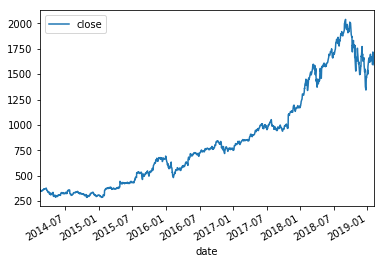

In [34]:
# plot
fig, ax = plt.subplots()
amazon.plot(ax=ax)
plt.show()

### Run Dicky-fuller test

In [35]:
results = adfuller(amazon['close'])
print('test statistics ->', results[0])
print('p value ->', results[1])

test statistics -> -1.344669096532606
p value -> 0.6084966311408375


In [36]:
# amazon_stationary = amazon['close'].diff().dropna()
# amazon_stationary.head()

date
2019-02-07    26.15
2019-02-06    25.89
2019-02-05    18.55
2019-02-04   -25.50
2019-02-01    -7.08
Name: close, dtype: float64

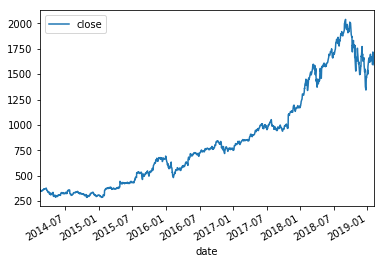

In [44]:
fig, ax = plt.subplots()
amazon.plot(ax=ax)
plt.show()

In [45]:
# results = adfuller(amazon_stationary)
# print('test statistics ->', results[0])
# print('p value ->', results[1])

In [46]:
model = SARIMAX(amazon, order=(1, 1, 1), trend = 'c')
result = model.fit()
# generate predictions
one_step_forecast = result.get_prediction(start = -30)

# extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# get confidence interval of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

print(mean_forecast)

C:\Users\Shubham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


date
2014-03-24    352.751444
2014-03-21    350.089899
2014-03-20    358.640927
2014-03-19    366.816607
2014-03-18    371.063683
2014-03-17    376.549671
2014-03-14    373.083834
2014-03-13    371.929681
2014-03-12    369.856325
2014-03-11    369.075522
2014-03-10    367.364098
2014-03-07    369.049223
2014-03-06    370.563854
2014-03-05    370.698550
2014-03-04    370.934714
2014-03-03    362.778087
2014-02-28    358.781934
2014-02-27    360.992686
2014-02-26    359.072448
2014-02-25    358.730307
2014-02-24    357.278397
2014-02-21    350.932122
2014-02-20    346.027860
2014-02-19    348.897351
2014-02-18    346.513613
2014-02-14    352.523615
2014-02-13    356.086043
2014-02-12    355.946693
2014-02-11    348.267228
2014-02-10    360.353379
dtype: float64


## Plotting one-step-ahead predictions

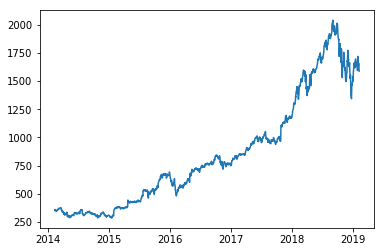

In [43]:
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

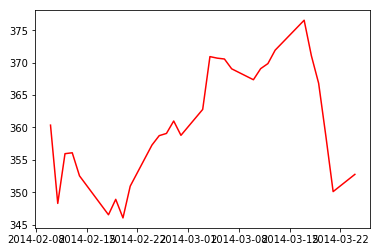

In [47]:
# plot the mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

No handles with labels found to put in legend.


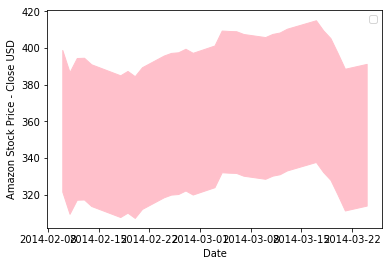

In [49]:
# shade the area between your confidence limits
plt.fill_between(confidence_intervals.index, lower_limits,
		 upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

### Generating dynamic forecasts

What if you wanted to predict the Amazon stock price, not just for tomorrow, but for next week or next month? This is where dynamical predictions come in.

It is more difficult to make precise long-term forecasts because the shock terms add up. The further into the future the predictions go, the more uncertain. This is especially true with stock data and so you will likely find that your predictions in this exercise are not as precise as those in the last exercise.

In [50]:
dynamic_forecast = result.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

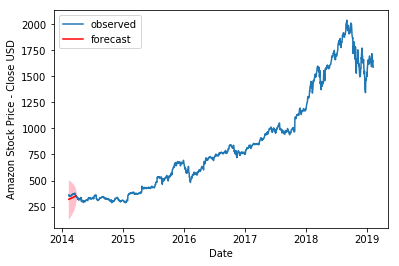

In [51]:
# Plotting predictions
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(confidence_intervals.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()